# Connect to Gdrive

In [1]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
import sys
sys.path.append('/content/gdrive/My Drive/ECS750P_project')

Mounted at /content/gdrive/


In [2]:
import configparser
import pandas as pd
import numpy as np
import os
import re
import json
import csv
import h5py as h5
from tqdm import tqdm
import pickle
import jieba
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
config = configparser.ConfigParser()
my_config = '/content/gdrive/MyDrive/ECS750P_project/Config/default.cfg'
with open('/content/gdrive/MyDrive/ECS750P_project/Config/default.cfg', 'r') as f:
    config.read_file(f)

dsgv_home = config.get('DSGV-PATHS', 'dsgv_home')
preproc_path = dsgv_home + '/Preproc/PreprocOut/'
feats_path = dsgv_home + '/ExtractFeats/ExtractOut/'
flickr_path = dsgv_home + '/Data/Flickr30k/'

# Download Dataset

Image:

https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset

Annotations:

https://github.com/BryanPlummer/flickr30k_entities

Chinese captions:

https://drive.google.com/file/d/1R0Fbnxn-2vB50fxyUCJD6xIkhy5UpmXn/view?usp=sharing


## Preprocess and visualisation

In [4]:
!pip install ijson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 4.2 MB/s 


In [ ]:
!python preproc.py flickrobj

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
treated as task-specific parameters:  []
 [ 2022-07-09 @ 14:35:04 ] starting to preprocess...
     [ 2022-07-09 @ 14:35:04 ] ... Flickr 30k Entities Objects
writing to disk:  ./PreprocOut/flickr_objdf.json.gz
 [ 2022-07-09 @ 14:36:37 ] ... done!


In [ ]:
import json
with open('PreprocOut/flickr_bbdf.json', 'r') as f:
        flickrbb = json.load(f)


In [ ]:
df_loaded = pd.read_json('PreprocOut/flickr_bbdf.json.gz', typ='frame', orient='split', compression='gzip')

In [ ]:
df_loaded

,i_corpus,image_id,region_id,subregion_id,bb
0,8,4978377853,225376,1,"[133, 128, 122, 372]"
1,8,4978377853,225377,1,"[117, 59, 186, 441]"
2,8,4978377853,225378,1,"[130, 178, 114, 199]"
3,8,4978377853,225382,1,"[247, 386, 21, 11]"
4,8,4978377853,225385,1,"[148, 125, 61, 59]"
...,...,...,...,...,...
275770,8,3131519555,95623,1,"[271, 51, 74, 59]"
275771,8,3131519555,95624,1,"[37, 1, 463, 186]"
275772,8,3131519555,95628,1,"[278, 86, 18, 15]"
275773,8,3131519555,95628,2,"[276, 86, 22, 14]"


In [ ]:
df_flickrobj = pd.read_json('PreprocOut/flickr_objdf.json.gz', typ='frame', orient='split', compression='gzip')

In [ ]:
df_flickrobj

,i_corpus,image_id,region_id,phrase,cat
0,8,3187924573,99601,Two seagulls,animals
1,8,3187924573,99604,water,scene
2,8,3187924573,99600,foreground bird,animals
3,8,3187924573,99603,object,other
4,8,3187924573,99602,beak,bodyparts
...,...,...,...,...,...
559762,8,408748500,154756,A child,people
559763,8,408748500,154757,a coat,clothing
559764,8,408748500,154760,someone,people
559765,8,408748500,154756,a boy,people


In [ ]:
df_flickrcap = pd.read_json('PreprocOut/flickr_capdf.json.gz', typ='frame', orient='split', compression='gzip')

In [ ]:
df_flickrcap

,i_corpus,image_id,caption_annotated,caption_raw,entities
0,8,3187924573,[/EN#99601/animals Two seagulls] on [/EN#99604...,"two seagulls on water , foreground bird has ob...","[99601, 99604, 99600, 99603, 99602]"
1,8,3187924573,[/EN#99600/animals A white bird] has [/EN#9960...,a white bird has something in its beak at it l...,"[99600, 99603, 99602, 0, 99604]"
2,8,3187924573,[/EN#99600/animals A large white bird] pulling...,a large white bird pulling a fish out of the w...,"[99600, 99605, 99604]"
3,8,3187924573,[/EN#99601/animals Two large seagulls] are in ...,two large seagulls are in the water .,"[99601, 99604]"
4,8,3187924573,[/EN#99600/animals A seagull] lands on [/EN#99...,a seagull lands on the water .,"[99600, 99604]"
...,...,...,...,...,...
158910,8,408748500,[/EN#154756/people The girl] in [/EN#154757/cl...,the girl in the red jacket is next to a pictur...,"[154756, 154757, 154761]"
158911,8,408748500,[/EN#154756/people The boy] is dressed in [/EN...,the boy is dressed in a red coat and stands ne...,"[154756, 154757, 154758]"
158912,8,408748500,[/EN#154756/people A child] in [/EN#154757/clo...,a child in a red coat stands near a funny deco...,"[154756, 154757, 154758]"
158913,8,408748500,[/EN#154756/people A child] wearing [/EN#15475...,a child wearing a coat looks back at someone .,"[154756, 154757, 154760]"


## Flicker30k

In [5]:
with open(flickr_path+'Flickr30kEntities/flickr30kzhbbosonval/TextData/seg.flickr30kzhbbosonval.caption.txt','r') as f:
    lines = f.readlines()
    # print(lines)
    line = [l.split(' ',1) for l in lines]
    df_val = pd.DataFrame(line, columns = ['id', 'sentence'])
    validation = pd.DataFrame()
    validation[['id','zbh']] = df_val['id'].str.split('#',1, expand=True)
    validation_list = validation['id'].drop_duplicates().to_list()
    df_val['img_id'] = df_val['id'].str.replace("#zhb#", "_")
    df_val['sentence'] = df_val['sentence'].str.strip('\n')
    df_val = df_val.drop(columns=['id'])

In [6]:
with open(flickr_path+'Flickr30kEntities/flickr30kzhbbosontrain/TextData/seg.flickr30kzhbbosontrain.caption.txt','r') as f:
    lines = f.readlines()
    line = [l.split(' ',1) for l in lines]
    df_train = pd.DataFrame (line, columns = ['id', 'sentence'])
    train = pd.DataFrame()
    train[['id','zbh']] = df_train['id'].str.split('#',1, expand=True)
    train_list = train['id'].drop_duplicates().to_list()
    df_train['img_id'] = df_train['id'].str.replace("#zhb#", "_")
    df_train['sentence'] = df_train['sentence'].str.strip('\n')
    df_train = df_train.drop(columns=['id'])

In [7]:
with open(flickr_path+'Flickr30kEntities/flickr30kzhmbosontest/TextData/seg.flickr30kzhmbosontest.caption.txt','r') as f:
    lines = f.readlines()
    line = [l.split(' ',1) for l in lines]
    df_test = pd.DataFrame (line, columns = ['id', 'sentence'])
    test = pd.DataFrame()
    test[['id','zbh']] = df_test['id'].str.split('#',1, expand=True)
    test_list = test['id'].drop_duplicates().to_list()
    df_test['img_id'] = df_test['id'].str.replace("#zhm#", "_")
    df_test['sentence'] = df_test['sentence'].str.strip('\n')
    df_test = df_test.drop(columns=['id'])

In [8]:
flickr30k_30_1_split = {}
flickr30k_30_1_split['train'] = [int(id) for id in train_list]
flickr30k_30_1_split['val'] = [int(id) for id in validation_list]
flickr30k_30_1_split['test'] = [int(id) for id in test_list]

In [9]:
with open(preproc_path + 'flickr30k_split.json', 'w') as outfile:
    json.dump(flickr30k_30_1_split, outfile)

In [10]:
with open(preproc_path + 'flickr30k_split.json', 'r') as f:
  s = json.load(f)

In [11]:
with open(flickr_path+'results.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter = '|',skipinitialspace=True)
    df_en = pd.DataFrame(reader)
    df_en.rename(columns=df_en.iloc[0], inplace = True)
    df_en.drop(df_en.index[0], inplace = True)
    df_en[['image_id', 'jpg']] = df_en['image_name'].str.split('.',expand=True)
    df_en['img_id'] = df_en['image_id'].astype(str) + "_" + df_en['comment_number']
    df_en = df_en.drop(columns=['image_name','jpg','image_id','comment_number'])

In [12]:
df_cn_en_val = pd.merge(df_val, df_en, how='inner', on = 'img_id')
df_cn_en_train = pd.merge(df_train, df_en, how='inner', on = 'img_id')
df_cn_en_test = pd.merge(df_test, df_en, how='inner', on = 'img_id')

### Flickr30k BBDF and Image visualisation

In [ ]:
with open("/content/gdrive/MyDrive/ECS750P_project/Preproc/PreprocOut/flickr_bbdf.json", "r") as f:
  bb = json.load(f)

In [ ]:
bbdf = pd.DataFrame(bb['data'],columns=bb['columns'],index=bb['index'])

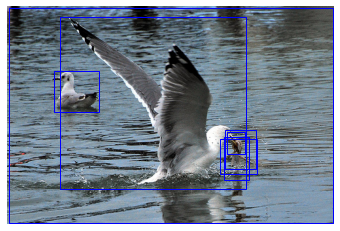

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

fig = plt.imshow(Image.open(flickr_path + 'flickr30k-images/3187924573.jpg'))
plt.axis('off')

# https://docs.python.org/3/library/xml.etree.elementtree.html
import xml.etree.ElementTree as ET
tree = ET.parse(flickr_path + '/Flickr30kEntities/Annotations/3187924573.xml')
root = tree.getroot()
boxes=[]
for obj in root.findall('object'):
  if obj.find('bndbox') is not None:
    coords = [c for c in obj.find('bndbox')] # xmin, ymin, xmax, ymax
    x = int(coords[0].text)
    y = int(coords[1].text)
    w = int(coords[2].text) - x
    h = int(coords[3].text) - y
    b = Rectangle((x,y), w, h,fill=False, color='b')

    plt.gca().add_patch(b)

## Translate English refexp to Chinese

https://pypi.org/project/googletrans/

In [13]:
flickr30k_refdf = pd.read_json('/content/gdrive/MyDrive/ECS750P_project/Preproc/PreprocOut/flickr_objdf.json.gz',
                                typ='frame', orient='split', compression='gzip')

In [14]:
flickr30k_refdf

,i_corpus,image_id,region_id,phrase,cat
0,8,3187924573,99601,Two seagulls,animals
1,8,3187924573,99604,water,scene
2,8,3187924573,99600,foreground bird,animals
3,8,3187924573,99603,object,other
4,8,3187924573,99602,beak,bodyparts
...,...,...,...,...,...
559762,8,408748500,154756,A child,people
559763,8,408748500,154757,a coat,clothing
559764,8,408748500,154760,someone,people
559765,8,408748500,154756,a boy,people


In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 1.4 MB 31.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=56bb77724adcd6386511084281691d9656e437eada84f94183554c649334ff1a
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
# split the datafrmae into several parts due to limited RAM
phrase_part_1 = flickr30k_refdf['phrase'][:100000]
phrase_part_2 = flickr30k_refdf['phrase'][100000:200000]
phrase_part_3 = flickr30k_refdf['phrase'][200000:300000]
phrase_part_4 = flickr30k_refdf['phrase'][300000:400000]
phrase_part_5 = flickr30k_refdf['phrase'][400000:500000]
phrase_part_6 = flickr30k_refdf['phrase'][500000:]

In [ ]:
cn_translation_1 = []
for phrase in tqdm(phrase_part_1):
    # translation = translator.translate(phrase,, dest='zh-tw').text
    cn_translation_1.append(translator.translate(phrase, dest='zh-tw').text)


100%|██████████| 100000/100000 [1:06:16<00:00, 25.15it/s]


In [ ]:
cn_translation_2 = []
for phrase in tqdm(phrase_part_2):
    # translation = translator.translate(phrase,, dest='zh-tw').text
    cn_translation_2.append(translator.translate(phrase, dest='zh-tw').text)

100%|██████████| 100000/100000 [57:59<00:00, 28.74it/s]


In [ ]:
cn_translation_3 = []
for phrase in tqdm(phrase_part_3):
    cn_translation_3.append(translator.translate(phrase, dest='zh-tw').text)

100%|██████████| 100000/100000 [54:40<00:00, 30.48it/s]


In [ ]:
cn_translation_4 = []
for phrase in tqdm(phrase_part_4):
    cn_translation_4.append(translator.translate(phrase, dest='zh-tw').text)

100%|██████████| 100000/100000 [58:40<00:00, 28.40it/s]


In [ ]:
cn_translation_5 = []
for phrase in tqdm(phrase_part_5):
    cn_translation_5.append(translator.translate(phrase, dest='zh-tw').text)

100%|██████████| 100000/100000 [51:02<00:00, 32.66it/s]


In [ ]:
cn_translation_6 = []
for phrase in tqdm(phrase_part_6):
    cn_translation_6.append(translator.translate(phrase, dest='zh-tw').text)

100%|██████████| 59767/59767 [32:56<00:00, 30.23it/s]


In [ ]:
cn_translation = cn_translation_1 + cn_translation_2 + cn_translation_3 + cn_translation_4 + cn_translation_5 + cn_translation_6
print(len(cn_translation))

559767


In [ ]:
with open('/content/gdrive/MyDrive/ECS750P_project/WACs/LocalDevel/cn_translation_all.pkl', 'wb') as f:
  pickle.dump(cn_translation, f)
with open('/content/gdrive/MyDrive/ECS750P_project/WACs/LocalDevel/cn_translation_all.pkl', 'rb') as f:
    cn_translation = pickle.load(f)

In [ ]:
phrase_cn = pd.DataFrame(cn_translation, columns=['phrase_cn'])

In [ ]:
flickr30k_refdf_cn = pd.concat([flickr30k_refdf, phrase_cn], axis=1)
flickr30k_refdf_cn

,i_corpus,image_id,region_id,phrase,cat,phrase_cn
0,8,3187924573,99601,Two seagulls,animals,兩隻海鷗
1,8,3187924573,99604,water,scene,水
2,8,3187924573,99600,foreground bird,animals,前景鳥
3,8,3187924573,99603,object,other,目的
4,8,3187924573,99602,beak,bodyparts,喙
...,...,...,...,...,...,...
559762,8,408748500,154756,A child,people,一個孩子
559763,8,408748500,154757,a coat,clothing,一件外套
559764,8,408748500,154760,someone,people,某人
559765,8,408748500,154756,a boy,people,一個男孩


In [ ]:
result = flickr30k_refdf_cn.to_json(compression='gzip')
with open('/content/gdrive/MyDrive/ECS750P_project/Preproc/PreprocOut/flickr30k_objdf_cn.json.gz', 'w') as f:
    f.write(result)

In [ ]:
# object dataframe with CN
with open('/content/gdrive/MyDrive/ECS750P_project/Preproc/PreprocOut/flickr30k_objdf_cn.json.gz', 'r') as f:
  refdf_cn = json.load(f)
  refdf_cn = pd.DataFrame(refdf_cn)

In [ ]:
flickr30k_capdf = pd.read_json('/content/gdrive/MyDrive/ECS750P_project/Preproc/PreprocOut/flickr_capdf.json.gz',
                                typ='frame', orient='split', compression='gzip')

In [ ]:
full_sent = [sent for sent in flickr30k_capdf['caption_raw'][-5:]]
full_sent

['the girl in the red jacket is next to a picture of a funny face .',
 'the boy is dressed in a red coat and stands next to a statue .',
 'a child in a red coat stands near a funny decoration .',
 'a child wearing a coat looks back at someone .',
 'a boy wears a red coat .']

In [ ]:
cn_translation_ex = []
for phrase in tqdm(full_sent):
    cn_translation_ex.append(translator.translate(phrase, dest='zh-tw').text)

100%|██████████| 5/5 [00:00<00:00,  9.71it/s]


In [ ]:
for phrase in cn_translation_ex:
    phrase = ''.join(phrase.split())
    seg_list = jieba.cut(phrase)
    print(phrase,'->','/'.join(list(seg_list)))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.503 seconds.
DEBUG:jieba:Loading model cost 1.503 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


身穿紅色夾克的女孩旁邊是一張滑稽面孔的照片。 -> 身穿/紅色/夾克/的/女孩/旁邊/是/一張/滑稽/面孔/的/照片/。
這個男孩穿著一件紅色的外套，站在一尊雕像旁邊。 -> 這個/男孩/穿著/一件/紅色/的/外套/，/站/在/一尊/雕像/旁邊/。
一個穿著紅色外套的孩子站在一個有趣的裝飾物附近。 -> 一個/穿著/紅色/外套/的/孩子/站/在/一個/有趣/的/裝飾物/附近/。
一個穿大衣的孩子回頭看著某人. -> 一個/穿/大衣/的/孩子/回頭/看著/某人/.
一個男孩穿著一件紅色的外套。 -> 一個/男孩/穿著/一件/紅色/的/外套/。


In [ ]:
for phrase in cn_translation_ex:
    phrase = ''.join(phrase.split())
    seg_list = jieba.cut(phrase, cut_all=True)
    print(phrase,'->','/'.join(list(seg_list)))

身穿紅色夾克的女孩旁邊是一張滑稽面孔的照片。 -> 身穿/紅/色/夾/克/的/女孩/旁/邊/是/一/張/滑稽/面孔/的/照片/。
這個男孩穿著一件紅色的外套，站在一尊雕像旁邊。 -> 這/個/男孩/穿著/一件/紅/色/的/外套/，/站/在/一尊/雕像/旁/邊/。
一個穿著紅色外套的孩子站在一個有趣的裝飾物附近。 -> 一/個/穿著/紅/色/外套/的/孩子/站/在/一/個/有趣/的/裝/飾/物/附近/。
一個穿大衣的孩子回頭看著某人. -> 一/個/穿/大衣/的/孩子/回/頭/看/著/某人/.
一個男孩穿著一件紅色的外套。 -> 一/個/男孩/穿著/一件/紅/色/的/外套/。


In [ ]:
entity_ex = list(refdf_cn['phrase_cn'][10:20])

In [ ]:
for phrase in entity_ex:
    seg_list = jieba.cut(phrase)
    print(phrase,'->','/'.join(list(seg_list)))

一隻大白鳥 -> 一/隻/大白/鳥
一條魚 -> 一條魚
水 -> 水
兩隻大海鷗 -> 兩/隻/大海/鷗
水 -> 水
一隻海鷗 -> 一/隻/海鷗
水 -> 水
一個蹣跚學步的男孩 -> 一個/蹣跚/學步/的/男孩
一頂藍色棒球帽 -> 一頂/藍色/棒球帽
單槓 -> 單槓


In [ ]:
for phrase in entity_ex:
    seg_list = jieba.cut(phrase, cut_all=True)
    print(phrase,'->','/'.join(list(seg_list)))

一隻大白鳥 -> 一/隻/大白/鳥
一條魚 -> 一/條/魚
水 -> 水
兩隻大海鷗 -> 兩/隻/大海/鷗
水 -> 水
一隻海鷗 -> 一/隻/海/鷗
水 -> 水
一個蹣跚學步的男孩 -> 一/個/蹣/跚/學/步/的/男孩
一頂藍色棒球帽 -> 一/頂/藍/色/棒球/棒球帽
單槓 -> 單/槓


Visualise bounding boxes

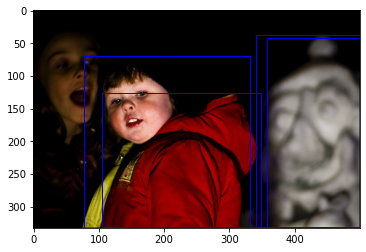

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html?highlight=rectangle#matplotlib.patches.Rectangle
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html#sphx-glr-gallery-text-labels-and-annotations-text-alignment-py
# https://www.statology.org/matplotlib-rectangle/
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle

plt.imshow(Image.open(flickr_path + 'flickr30k-images/408748500.jpg'))

# https://docs.python.org/3/library/xml.etree.elementtree.html
import xml.etree.ElementTree as ET
tree = ET.parse(flickr_path + '/Flickr30kEntities/Annotations/408748500.xml')
root = tree.getroot()
boxes=[]
for obj in root.findall('object'):
  if obj.find('bndbox') is not None:
    coords = [c for c in obj.find('bndbox')] # xmin, ymin, xmax, ymax
    x = int(coords[0].text)
    y = int(coords[1].text)
    w = int(coords[2].text) - x
    h = int(coords[3].text) - y
    b = Rectangle((x,y), w, h,fill=False, color='b')

    plt.gca().add_patch(b)



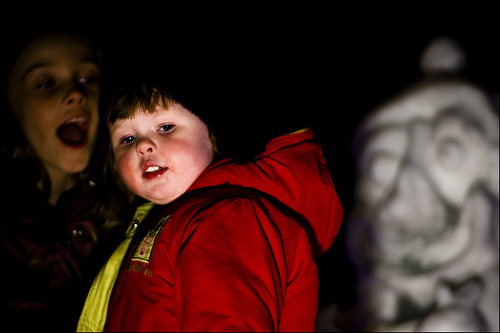

154756
70 333 78 332


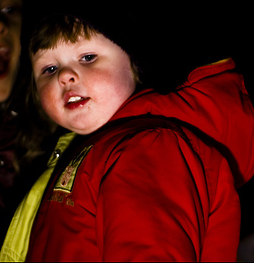

154757
126 332 105 348


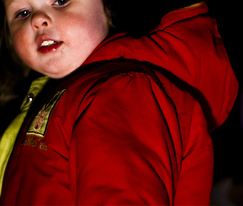

154758
38 332 340 500


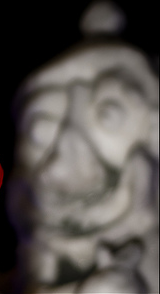

154761
42 332 357 500


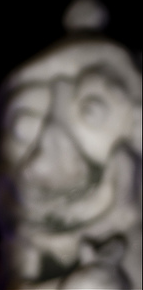

In [ ]:
# https://colab.research.google.com/github/dphi-official/Deep_Learning_Bootcamp/blob/master/OpenCV/DL_Day12_OpenCV.ipynb
# https://learnopencv.com/cropping-an-image-using-opencv/
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread(flickr_path + 'flickr30k-images/408748500.jpg')
# print(img.shape)
cv2_imshow(img)

tree = ET.parse(flickr_path + '/Flickr30kEntities/Annotations/408748500.xml')
root = tree.getroot()
boxes=[]
for obj in root.findall('object'):
  if obj.find('bndbox') is not None:
    region_id = obj.find('name').text
    print(region_id)
    coords = [c for c in obj.find('bndbox')] # xmin, ymin, xmax, ymax
    start_col = int(coords[0].text)
    start_row = int(coords[1].text)
    end_col = int(coords[2].text) 
    end_row = int(coords[3].text)
    # b = Rectangle((x,y), w, h,fill=False, color='b')
    print(start_row,end_row,start_col,end_col)
    cropped = img[start_row:end_row, start_col:end_col]
    cv2_imshow(cropped)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Extract Features

Extract feature with ResNet

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python extract.py rsn50-max flickr_bbdf

Streaming output truncated to the last 5000 lines.
(100, 3) (100, 2048) (100, 7)
  9% 26080/275775 [18:46<2:42:09, 25.66it/s]     [ 2022-07-09 @ 09:56:01 ] new batch! (261 26099) Extracting!...
(100, 3) (100, 2048) (100, 7)
  9% 26195/275775 [18:50<2:28:17, 28.05it/s]     [ 2022-07-09 @ 09:56:05 ] new batch! (262 26199) Extracting!...
(100, 3) (100, 2048) (100, 7)
 10% 26294/275775 [18:55<3:04:26, 22.54it/s]     [ 2022-07-09 @ 09:56:10 ] new batch! (263 26299) Extracting!...
(100, 3) (100, 2048) (100, 7)
 10% 26382/275775 [18:59<3:59:44, 17.34it/s]     [ 2022-07-09 @ 09:56:14 ] new batch! (264 26399) Extracting!...
(100, 3) (100, 2048) (100, 7)
 10% 26486/275775 [19:03<1:48:09, 38.41it/s]     [ 2022-07-09 @ 09:56:18 ] new batch! (265 26499) Extracting!...
(100, 3) (100, 2048) (100, 7)
 10% 26595/275775 [19:07<2:12:40, 31.30it/s]     [ 2022-07-09 @ 09:56:22 ] new batch! (266 26599) Extracting!...
(100, 3) (100, 2048) (100, 7)
 10% 26698/275775 [19:10<2:02:23, 33.92it/s]     [ 2022-07-09

## Concatenate Flickr features

In [15]:
with h5.File('/content/gdrive/MyDrive/ECS750P_project/ExtractFeats/ExtractOut/flickr_bbdf_rsn50-max_1.hdf5') as f:
  X = np.array(f["img_feats"])
with h5.File('/content/gdrive/MyDrive/ECS750P_project/ExtractFeats/ExtractOut/flickr_bbdf_rsn50-max_2.hdf5') as f:
  Y = np.array(f["img_feats"])
with h5.File('/content/gdrive/MyDrive/ECS750P_project/ExtractFeats/ExtractOut/flickr_bbdf_rsn50-max_3.hdf5') as f:
  Z = np.array(f["img_feats"])

In [21]:
all_feats = np.concatenate((X, Y, Z), axis=0)
with h5.File('/content/gdrive/MyDrive/ECS750P_project/ExtractFeats/ExtractOut/flickr_bbdf_rsn50-max_all.hdf5', 'w') as f:
    dset = f.create_dataset("img_feats", data=all_feats)

In [23]:
with h5.File('/content/gdrive/MyDrive/ECS750P_project/ExtractFeats/ExtractOut/flickr_bbdf_rsn50-max_all.hdf5') as f:
  X = np.array(f["img_feats"])
  print(len(X))

275775


In [24]:
X

array([[8.00000000e+00, 4.97837785e+09, 2.25376010e+05, ...,
        2.61579251e-01, 6.94000000e-01, 2.20840244e-01],
       [8.00000000e+00, 4.97837785e+09, 2.25377010e+05, ...,
        4.72772334e-01, 6.94000000e-01, 1.54222305e-01],
       [8.00000000e+00, 4.97837785e+09, 2.25378010e+05, ...,
        1.30755043e-01, 6.94000000e-01, 1.00671460e-01],
       ...,
       [8.00000000e+00, 3.13151956e+09, 9.56280100e+04, ...,
        1.62162162e-03, 1.50150150e+00, 2.72468151e-01],
       [8.00000000e+00, 3.13151956e+09, 9.56280200e+04, ...,
        1.84984985e-03, 1.50150150e+00, 2.73953969e-01],
       [8.00000000e+00, 3.13151956e+09, 9.56290100e+04, ...,
        1.06552553e-01, 1.50150150e+00, 1.67960979e-01]])

# References

The references used to create this notebook

Visualisation:

https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html?highlight=rectangle#matplotlib.patches.Rectangle

https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html#sphx-glr-gallery-text-labels-and-annotations-text-alignment-py

https://www.statology.org/matplotlib-rectangle/

https://colab.research.google.com/github/dphi-official/Deep_Learning_Bootcamp/blob/master/OpenCV/DL_Day12_OpenCV.ipynb

https://learnopencv.com/cropping-an-image-using-opencv/


Translation:

https://pypi.org/project/googletrans/

https://github.com/ssut/py-googletrans/issues/299